# WELCOME!

# #Tasks

#### 1. Data Cleaning & Exploratory Data Analysis

- Import Modules, Load Data & Data Review
- Follow the Steps Below

    *i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.*
    
    *ii. What does the letter "C" in the invoiceno column mean?*
    
    *iii. Handling Missing Values*
    
    *iv. Clean the Data from the Noise and Missing Values*
    
    *v. Explore the Orders*
    
    *vi. Explore Customers by Country*
    
    *vii. Explore the UK Market*
    
#### 2. RFM Analysis

- Follow the steps below

   *i. Import Libraries*
   
   *ii. Review "df_uk" DataFrame (the df_uk what you create at the end of the Task 1)*
   
   *iii. Calculate Recency*
   
   *iv. Calculate Frequency*
   
   *v. Calculate Monetary Values*
   
   *vi. Create RFM Table*

#### 3. Customer Segmentation with RFM Scores
- Calculate RFM Scoring

    *i. Creating the RFM Segmentation Table*
 
- Plot RFM Segments

#### 4. Applying K-Means Clustering
- Data Pre-Processing and Exploring

    *i. Define and Plot Feature Correlations*
 
    *ii. Visualize Feature Distributions*
 
    *iii. Data Normalization*

- K-Means Implementation

    *i. Define Optimal Cluster Number (K) by using "Elbow Method" and "Silhouette Analysis"*
 
    *ii. Visualize the Clusters*
 
    *iii. Assign the label*
 
    *iv. Conclusion*
 
#### 5. Create Cohort and Conduct Cohort Analysis
- Future Engineering

    *i. Extract the Month of the Purchase*
 
    *ii. Calculating time offset in Months i.e. Cohort Index*
 
- Create 1st Cohort: User Number & Retention Rate 

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 1 using seaborn and matplotlib*

- Create 2nd Cohort: Average Quantity Sold 

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 2 using seaborn and matplotlib*

- Create 3rd Cohort: Average Sales

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 3 using seaborn and matplotlib*
    
- **Note: There may be sub-tasks associated with each task, you will see them in order during the course of the work.**


# 1. Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")


sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


In [ ]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom  
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom  
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom

In [ ]:
print('{:,} rows; {:,} columns'
      .format(df.shape[0], df.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(df[df.CustomerID.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(),
                                    df['InvoiceDate'].max()))


541,909 rows; 8 columns
135,080 transactions don't have a customer id
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [ ]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

Quantity  UnitPrice  CustomerID
count 541909.000 541909.000  406829.000
mean       9.552      4.611   15287.691
std      218.081     96.760    1713.600
min   -80995.000 -11062.060   12346.000
25%        1.000      1.250   13953.000
50%        3.000      2.080   15152.000
75%       10.000      4.130   16791.000
max    80995.000  38970.000   18287.000

In [ ]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
print('Dublicate rows: {}'.format(df.duplicated().sum()))

Dublicate rows: 5268


### i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

In [ ]:
df["Quantity"].corr(df["UnitPrice"])

-0.0012349245448702877

We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out.

### ii. What does the letter "C" in the InvoiceNo column mean?

If the invoice number starts with the letter "C", it means the order was cancelled. Or those who abandon their order.

When we filter canceled orders by Quantity> 0 or filter non-canceled orders by Quantity <0 nothing returns, this confirms that negative values mean the order was canceled. So lets find out how many orders were cancelled?

In [ ]:
df[df['InvoiceDate'].astype(str).str.startswith('C')]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [ ]:
df[df['InvoiceNo'].astype(str).str[0]=='C']

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount    -1.000   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS    -1.000   
235      C536391 22556.000    PLASTERS IN TIN CIRCUS PARADE    -12.000   
236      C536391 21984.000  PACK OF 12 PINK PAISLEY TISSUES    -24.000   
237      C536391 21983.000  PACK OF 12 BLUE PAISLEY TISSUES    -24.000   
...          ...       ...                               ...       ...   
540449   C581490 23144.000   ZINC T-LIGHT HOLDER STARS SMALL   -11.000   
541541   C581499         M                            Manual    -1.000   
541715   C581568 21258.000        VICTORIAN SEWING BOX LARGE    -5.000   
541716   C581569 84978.000  HANGING HEART JAR T-LIGHT HOLDER    -1.000   
541717   C581569 20979.000     36 PENCILS TUBE RED RETROSPOT    -5.000   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00     27.500   14527.000  United Kingdom  
154    2010-12-01 09:49:00      4.650   15311.000  United Kingdom  
235    2010-12-01 10:24:00      1.650   17548.000  United Kingdom  
236    2010-12-01 10:24:00      0.290   17548.000  United Kingdom  
237    2010-12-01 10:24:00      0.290   17548.000  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00      0.830   14397.000  United Kingdom  
541541 2011-12-09 10:28:00    224.690   15498.000  United Kingdom  
541715 2011-12-09 11:57:00     10.950   15311.000  United Kingdom  
541716 2011-12-09 11:58:00      1.250   17315.000  United Kingdom  
541717 2011-12-09 11:58:00      1.250   17315.000  United Kingdom  

[9288 rows x 8 columns]

In [ ]:
df[(df['InvoiceNo'].str[0]=='C')&(df["Quantity"]<0)]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount    -1.000   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS    -1.000   
235      C536391 22556.000    PLASTERS IN TIN CIRCUS PARADE    -12.000   
236      C536391 21984.000  PACK OF 12 PINK PAISLEY TISSUES    -24.000   
237      C536391 21983.000  PACK OF 12 BLUE PAISLEY TISSUES    -24.000   
...          ...       ...                               ...       ...   
540449   C581490 23144.000   ZINC T-LIGHT HOLDER STARS SMALL   -11.000   
541541   C581499         M                            Manual    -1.000   
541715   C581568 21258.000        VICTORIAN SEWING BOX LARGE    -5.000   
541716   C581569 84978.000  HANGING HEART JAR T-LIGHT HOLDER    -1.000   
541717   C581569 20979.000     36 PENCILS TUBE RED RETROSPOT    -5.000   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00     27.500   14527.000  United Kingdom  
154    2010-12-01 09:49:00      4.650   15311.000  United Kingdom  
235    2010-12-01 10:24:00      1.650   17548.000  United Kingdom  
236    2010-12-01 10:24:00      0.290   17548.000  United Kingdom  
237    2010-12-01 10:24:00      0.290   17548.000  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00      0.830   14397.000  United Kingdom  
541541 2011-12-09 10:28:00    224.690   15498.000  United Kingdom  
541715 2011-12-09 11:57:00     10.950   15311.000  United Kingdom  
541716 2011-12-09 11:58:00      1.250   17315.000  United Kingdom  
541717 2011-12-09 11:58:00      1.250   17315.000  United Kingdom  

[9288 rows x 8 columns]

In [ ]:
df.loc[df["Quantity"]>=0]

InvoiceNo StockCode                          Description  Quantity  \
0      536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1      536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2      536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3      536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4      536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   
...           ...       ...                                  ...       ...   
541904 581587.000 22613.000          PACK OF 20 SPACEBOY NAPKINS    12.000   
541905 581587.000 22899.000         CHILDREN'S APRON DOLLY GIRL      6.000   
541906 581587.000 23254.000        CHILDRENS CUTLERY DOLLY GIRL      4.000   
541907 581587.000 23255.000      CHILDRENS CUTLERY CIRCUS PARADE     4.000   
541908 581587.000 22138.000        BAKING SET 9 PIECE RETROSPOT      3.000   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00      2.550   17850.000  United Kingdom  
1      2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
2      2010-12-01 08:26:00      2.750   17850.000  United Kingdom  
3      2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
4      2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00      0.850   12680.000          France  
541905 2011-12-09 12:50:00      2.100   12680.000          France  
541906 2011-12-09 12:50:00      4.150   12680.000          France  
541907 2011-12-09 12:50:00      4.150   12680.000          France  
541908 2011-12-09 12:50:00      4.950   12680.000          France  

[531285 rows x 8 columns]

In [ ]:
df.loc[df["Quantity"]<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount    -1.000   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS    -1.000   
235      C536391 22556.000    PLASTERS IN TIN CIRCUS PARADE    -12.000   
236      C536391 21984.000  PACK OF 12 PINK PAISLEY TISSUES    -24.000   
237      C536391 21983.000  PACK OF 12 BLUE PAISLEY TISSUES    -24.000   
...          ...       ...                               ...       ...   
540449   C581490 23144.000   ZINC T-LIGHT HOLDER STARS SMALL   -11.000   
541541   C581499         M                            Manual    -1.000   
541715   C581568 21258.000        VICTORIAN SEWING BOX LARGE    -5.000   
541716   C581569 84978.000  HANGING HEART JAR T-LIGHT HOLDER    -1.000   
541717   C581569 20979.000     36 PENCILS TUBE RED RETROSPOT    -5.000   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00     27.500   14527.000  United Kingdom  
154    2010-12-01 09:49:00      4.650   15311.000  United Kingdom  
235    2010-12-01 10:24:00      1.650   17548.000  United Kingdom  
236    2010-12-01 10:24:00      0.290   17548.000  United Kingdom  
237    2010-12-01 10:24:00      0.290   17548.000  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00      0.830   14397.000  United Kingdom  
541541 2011-12-09 10:28:00    224.690   15498.000  United Kingdom  
541715 2011-12-09 11:57:00     10.950   15311.000  United Kingdom  
541716 2011-12-09 11:58:00      1.250   17315.000  United Kingdom  
541717 2011-12-09 11:58:00      1.250   17315.000  United Kingdom  

[10624 rows x 8 columns]

In [ ]:
df.iloc[235]

InvoiceNo                             C536391
StockCode                           22556.000
Description    PLASTERS IN TIN CIRCUS PARADE 
Quantity                              -12.000
InvoiceDate               2010-12-01 10:24:00
UnitPrice                               1.650
CustomerID                          17548.000
Country                        United Kingdom
Name: 235, dtype: object

In [ ]:
df.InvoiceNo.loc[df["Quantity"]<0].value_counts()

C570867     101
C560540      57
C548460      45
C560855      41
C570828      39
           ... 
558451.0      1
558457.0      1
C545330       1
558464.0      1
C536379       1
Name: InvoiceNo, Length: 5172, dtype: int64

#### 3836 or about 15% of the orders were cancelled. Looking deeper into why these orders were cancelled may prevent future cancellations. Now let's find out what a negative UnitPrice means.


### iii. Handling Missing Values

In [ ]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
df.Description.isna().value_counts()

False    540455
True       1454
Name: Description, dtype: int64

In [ ]:
df.CustomerID.isna().value_counts()

False    406829
True     135080
Name: CustomerID, dtype: int64

In [ ]:
df = df[(df.Quantity > 0) & (df.UnitPrice > 0)]
#dropping cancelled orders

Since the customer ID's are missing, lets assume these orders were not made by the customers already in the data set because those customers already have ID's. 

We also don't want to assign these orders to those customers because this would alter the insights we draw from the data. 


### iv. Clean the Data from the Noise and Missing Values

In [ ]:
df.size

4240832

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.size

3183072

In [ ]:
((4335272-3254632)/4335272)*100

24.926694334288598

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom  
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom  
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom

### v. Explore the Orders


1. Find the unique number of InvoiceNo  per customer

In [ ]:
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

CustomerID
12748.000    209
14911.000    201
17841.000    124
13089.000     97
14606.000     93
            ... 
15314.000      1
15313.000      1
15308.000      1
15307.000      1
15300.000      1
Name: InvoiceNo, Length: 4338, dtype: int64

In [ ]:
df[df["CustomerID"]=="nan"]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

2. What's the average number of unique items per order or per customer?

In [ ]:
df.groupby(["InvoiceNo", 'StockCode'])['Quantity'].mean() 

InvoiceNo   StockCode
536365.000  21730.0     6.000
            22752.0     2.000
            71053.0     6.000
            84029E      6.000
            84029G      6.000
                         ... 
581587.000  22730.0     4.000
            22899.0     6.000
            23254.0     4.000
            23255.0     4.000
            23256.0     4.000
Name: Quantity, Length: 387841, dtype: float64

3. Let's see how this compares to the number of unique products per customer.

In [ ]:
df.groupby(['CustomerID', 'InvoiceNo', 'StockCode'])['Quantity'].sum()

CustomerID  InvoiceNo   StockCode
12346.000   541431.000  23166.0     74215.000
12347.000   537626.000  20780.0        12.000
                        20782.0         6.000
                        21064.0         6.000
                        21171.0        12.000
                                       ...   
18287.000   570715.000  85039A         48.000
                        85039B         48.000
            573167.000  21014.0        24.000
                        21824.0        48.000
                        23264.0        36.000
Name: Quantity, Length: 387841, dtype: float64

### vi. Explore Customers by Country

1. What's the total revenue per country?

In [ ]:
df["Cost"] = df["Quantity"]*df["UnitPrice"]

In [ ]:
df[["Quantity", "UnitPrice", "Cost"]].head()

Quantity  UnitPrice   Cost
0     6.000      2.550 15.300
1     6.000      3.390 20.340
2     8.000      2.750 22.000
3     6.000      3.390 20.340
4     6.000      3.390 20.340

In [ ]:
df.groupby('Country')[["Cost"]].sum().sort_values(by="Cost", ascending=False).head()

Cost
Country                   
United Kingdom 7308391.554
Netherlands     285446.340
EIRE            265545.900
Germany         228867.140
France          209024.050

2. Visualize number of customer per country

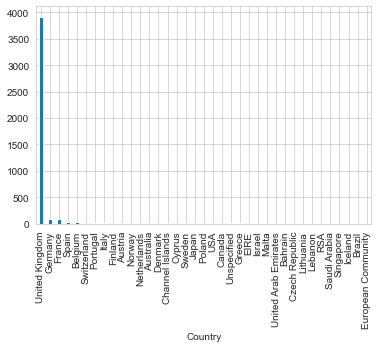

In [ ]:
df.groupby('Country')["CustomerID"].nunique().sort_values(ascending=False).plot.bar();


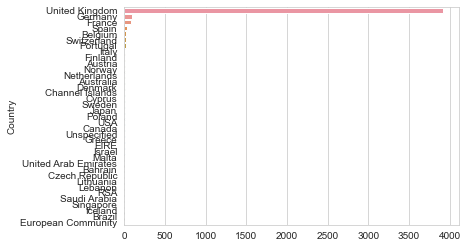

In [ ]:
sns.barplot(y = df.groupby('Country')["CustomerID"].nunique().sort_values(ascending=False).index, 
            x = df.groupby('Country')["CustomerID"].nunique().sort_values(ascending=False).values);

3. Visualize total cost per country

In [ ]:
pd.DataFrame(df.groupby('Country').Cost.sum().sort_values(ascending=False)).head()

Cost
Country                   
United Kingdom 7308391.554
Netherlands     285446.340
EIRE            265545.900
Germany         228867.140
France          209024.050

In [ ]:
df.groupby("Country")["CustomerID"].sum().sort_values(ascending=False)

Country
United Kingdom         5510572531.000
Germany                 114347054.000
EIRE                    106694901.000
France                  105750585.000
Netherlands              34020369.000
Spain                    32067768.000
Belgium                  25246701.000
Switzerland              23312286.000
Portugal                 18634782.000
Australia                14721267.000
Norway                   13322163.000
Channel Islands          11138335.000
Italy                     9588028.000
Finland                   8574309.000
Cyprus                    7616904.000
Sweden                    6637579.000
Austria                   4982601.000
Denmark                   4757518.000
Poland                    4201606.000
Japan                     4095425.000
Unspecified               3348046.000
Israel                    3139135.000
Singapore                 2829168.000
Canada                    2615483.000
USA                       2260641.000
Iceland                   2247154.000
Gree

In [ ]:
df_total_cost = pd.DataFrame(df.groupby('Country')["Cost"].sum().sort_values(ascending=False))

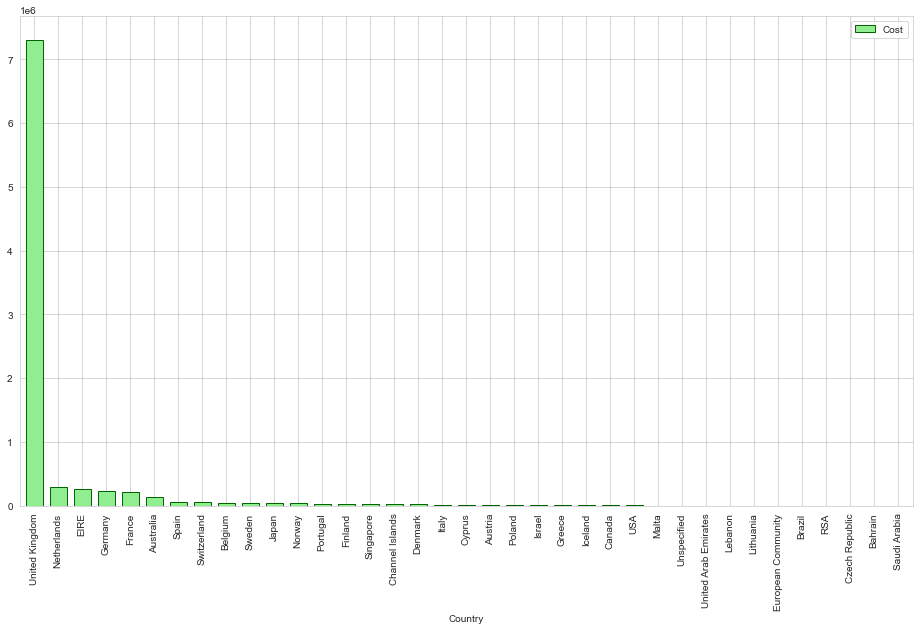

In [ ]:
# Attention to up left corner of plot --> 1e6 means 10**6
df_total_cost.plot(kind="bar", width=0.7, color='lightgreen', edgecolor='darkgreen', figsize=(16,9));

In [ ]:
# PLOTLY TREEMAP
fig = px.treemap(df_total_cost.iloc[:10],
                 path=[df_total_cost.iloc[:10].index], 
                 values='Cost', 
                 width=1000, 
                 height=600)
fig.update_layout(title_text='Total Spent By Countries',
                  title_x = 0.5, title_font = dict(size=20)
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<IPython.core.display.Javascript object>

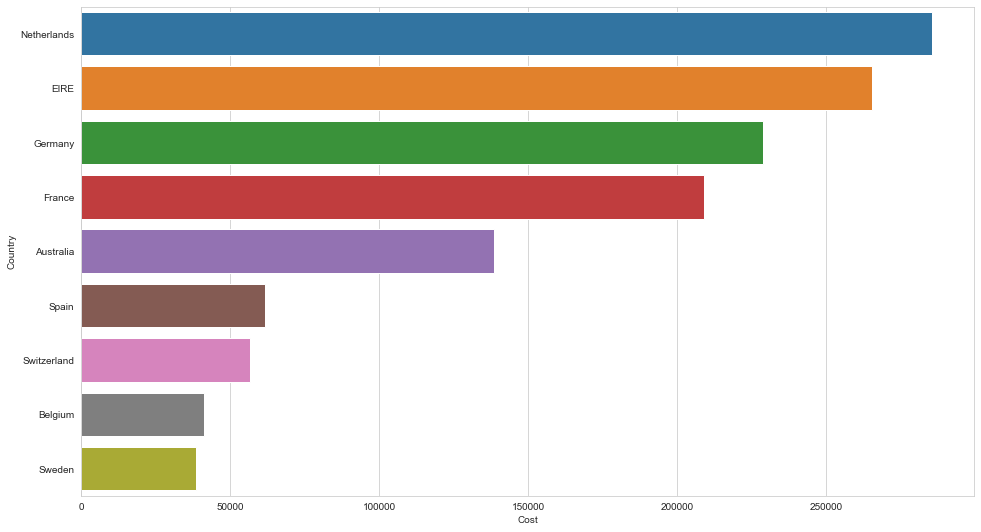

In [ ]:
#Revenue by Country without UK
plt.figure(figsize = (16,9))
sns.barplot(data = df_total_cost.iloc[1:10], x = df_total_cost.iloc[1:10]["Cost"], y = df_total_cost.iloc[1:10].index);


In [ ]:
# PLOTLY TREEMAP
fig = px.treemap(df_total_cost.iloc[1:10],
                 path=[df_total_cost.iloc[1:10].index], 
                 values='Cost', 
                 width=1000, 
                 height=600)
fig.update_layout(title_text='Total Spent by Country without UK',
                  title_x = 0.5, title_font = dict(size=20)
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<IPython.core.display.Javascript object>

#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### vii. Explore the UK Market


1. Create df_uk DataFrame

In [ ]:
df_UK = pd.DataFrame(df[df["Country"]=="United Kingdom"])
 

In [ ]:
df_UK.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300  
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340  
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000  
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340  
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340

In [ ]:
df_UK.size

3188889

In [ ]:
df[df["Country"]=="United Kingdom"].size

3188889

2. What are the most popular products that are bought in the UK?

In [ ]:
df_UK["StockCode"].value_counts().head()

85123A     1947
85099B     1464
22423.0    1426
84879.0    1333
47566.0    1307
Name: StockCode, dtype: int64

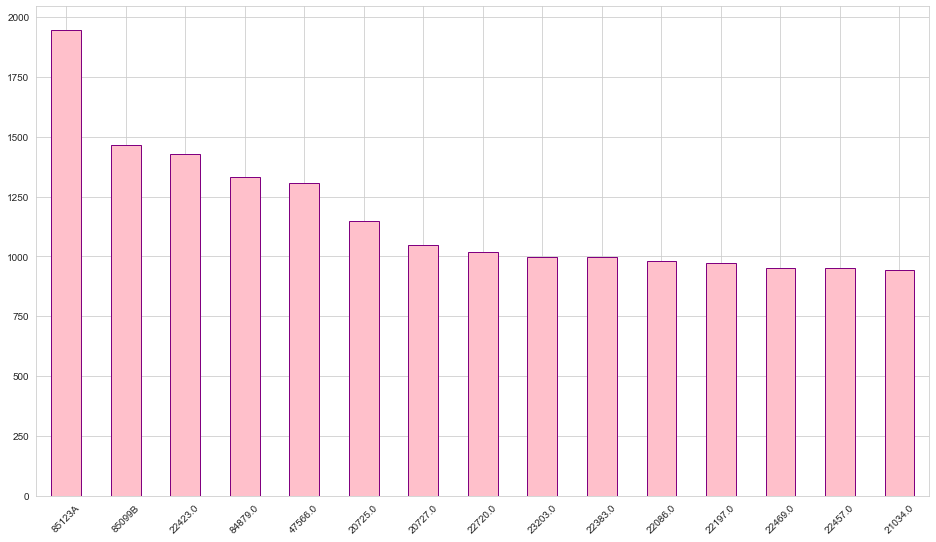

In [ ]:
df_UK["StockCode"].value_counts().head(15).plot(kind="bar", width=0.5, color='pink', edgecolor='purple', figsize=(16,9))
plt.xticks(rotation=45);

In [ ]:
df_UK.groupby("StockCode")["CustomerID"].nunique().sort_values(ascending= False)

StockCode
85123A     821
22423.0    767
47566.0    659
84879.0    642
22086.0    594
          ... 
71143.0      1
84206B       1
84201C       1
90060B       1
84854.0      1
Name: CustomerID, Length: 3645, dtype: int64

In [ ]:
df[df["StockCode"]=="85123A"].Description.head(1)

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

![](https://18.cdn.ekm.net/ekmps/shops/mochaberry/images/cream-hanging-heart-t-light-holder-[2]-356-p.jpg?v=203c7948-6978-44e0-b8a2-5c5ac9211c0a "WHITE HANGING HEART T-LIGHT HOLDER")

### We will continue analyzing the UK transactions with customer segmentation.

# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM]** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

### i. Import Libraries

### ii. Review df_uk DataFrame

In [ ]:
df_UK.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300  
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340  
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000  
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340  
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340

### iii. Recency: Days since last purchase
To calculate the recency values, follow these steps in order:

1. To calculate recency, we need to choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.
2. Create a new column called Date which contains the invoice date without the timestamp
3. Group by CustomerID and check the last date of purchase
4. Calculate the days since last purchase
5. Drop Last_Purchase_Date since we don't need it anymore
6. Plot RFM distributions

In [ ]:
last_invoice = max(df_UK['InvoiceDate'])
last_invoice

Timestamp('2011-12-09 12:49:00')

In [ ]:
first_invoice = min(df_UK['InvoiceDate'])
first_invoice

Timestamp('2010-12-01 08:26:00')

In [ ]:
last_invoice = pd.to_datetime(last_invoice).date()
last_invoice

datetime.date(2011, 12, 9)

In [ ]:
first_invoice = pd.to_datetime(first_invoice).date()
first_invoice

datetime.date(2010, 12, 1)

1. Choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.

2. Create a new column called Date which contains the invoice date without the timestamp

In [ ]:
df_UK["Date"] = df_UK['InvoiceDate'].dt.date
df_UK.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   

         Date  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

3. Group by CustomerID and check the last date of purchase

In [ ]:
df_UK["Last_Purchased_Date"] = df_UK.groupby("CustomerID").Date.transform(max)
df_UK.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   

         Date Last_Purchased_Date  
0  2010-12-01          2010-12-02  
1  2010-12-01          2010-12-02  
2  2010-12-01          2010-12-02  
3  2010-12-01          2010-12-02  
4  2010-12-01          2010-12-02

4. Calculate the days since last purchase

In [ ]:
df_UK.groupby('CustomerID')['Last_Purchased_Date'].apply(lambda x: last_invoice - x)

0        372 days
1        372 days
2        372 days
3        372 days
4        372 days
           ...   
541889     0 days
541890     0 days
541891     0 days
541892     0 days
541893     0 days
Name: Last_Purchased_Date, Length: 354321, dtype: timedelta64[ns]

In [ ]:
df_UK["Recency"] = df_UK.groupby('CustomerID')['Last_Purchased_Date'].apply(lambda x: last_invoice - x)
df_UK.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   

         Date Last_Purchased_Date  Recency  
0  2010-12-01          2010-12-02 372 days  
1  2010-12-01          2010-12-02 372 days  
2  2010-12-01          2010-12-02 372 days  
3  2010-12-01          2010-12-02 372 days  
4  2010-12-01          2010-12-02 372 days

5. Drop Last_Purchase_Date since we don't need it anymore

In [ ]:
df_UK = df_UK.drop('Last_Purchased_Date',axis=1)

6. Plot RFM distributions

In [ ]:
df_UK.Recency.dtype.type

numpy.timedelta64

In [ ]:
df_UK['Recency'] = pd.to_numeric(df_UK['Recency'].dt.days, downcast='integer', errors='coerce')
df_UK.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   

         Date  Recency  
0  2010-12-01      372  
1  2010-12-01      372  
2  2010-12-01      372  
3  2010-12-01      372  
4  2010-12-01      372

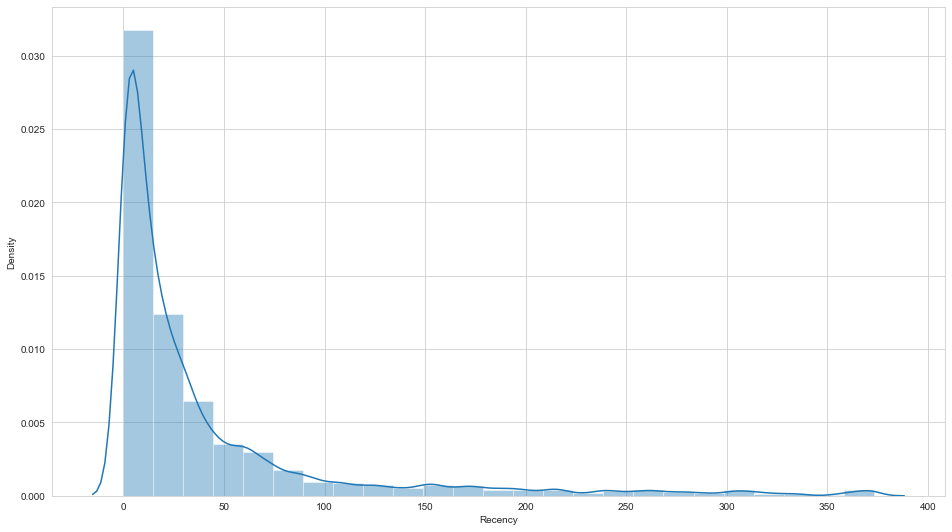

In [ ]:
plt.figure(figsize=(16,9))
sns.distplot(df_UK['Recency'], bins=25)
plt.show()

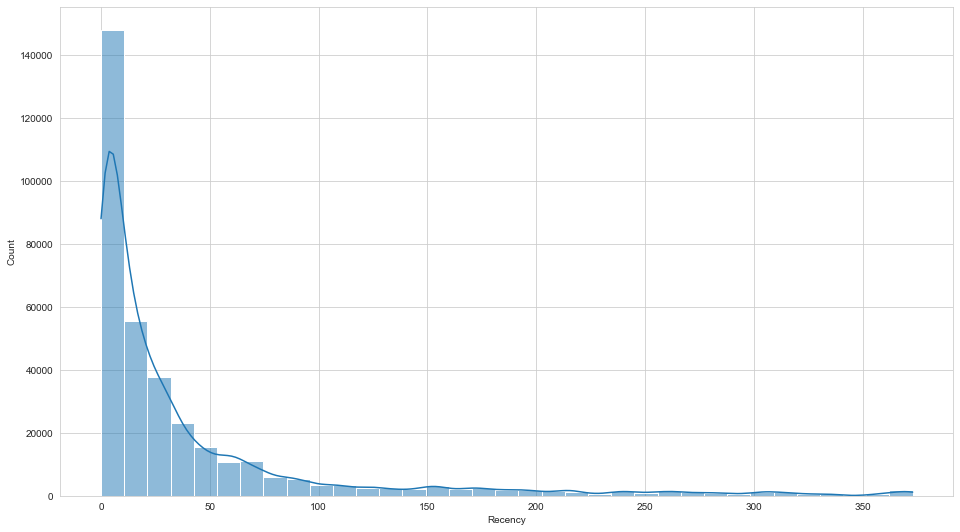

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(df_UK['Recency'], kde = True, bins=35);

### iv. Frequency: Number of purchases

To calculate how many times a customer purchased something, we need to count how many invoices each customer has. To calculate the frequency values, follow these steps in order:

1. Make a copy of df_uk and drop duplicates

In [ ]:
df_UK.duplicated().sum()

5118

In [ ]:
df_UK.duplicated().any()

True

In [ ]:
df_UK = df_UK.drop_duplicates()

In [ ]:
df_UK.duplicated().sum()

0

2. Calculate the frequency of purchases

In [ ]:
df_UK.groupby('CustomerID')["InvoiceNo"].count().sort_values(ascending = False)

CustomerID
17841.000    7676
14096.000    5111
12748.000    4412
14606.000    2677
15311.000    2366
             ... 
17347.000       1
15316.000       1
15313.000       1
13270.000       1
12346.000       1
Name: InvoiceNo, Length: 3920, dtype: int64

In [ ]:
df_UK.groupby('CustomerID')["InvoiceNo"].transform('count').sort_values(ascending = False)

388170    7676
303314    7676
303321    7676
303320    7676
303319    7676
          ... 
63201        1
206692       1
293674       1
252          1
255504       1
Name: InvoiceNo, Length: 349203, dtype: int64

In [ ]:
df_UK['Frequency'] = df_UK.groupby('CustomerID')["InvoiceNo"].transform('count')
df_UK.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0 536365.000    85123A  WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                 WHITE METAL LANTERN     6.000   
2 536365.000    84406B      CREAM CUPID HEARTS COAT HANGER     8.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000   

         Date  Recency  Frequency  
0  2010-12-01      372        297  
1  2010-12-01      372        297  
2  2010-12-01      372        297

3. Plot RFM distributions

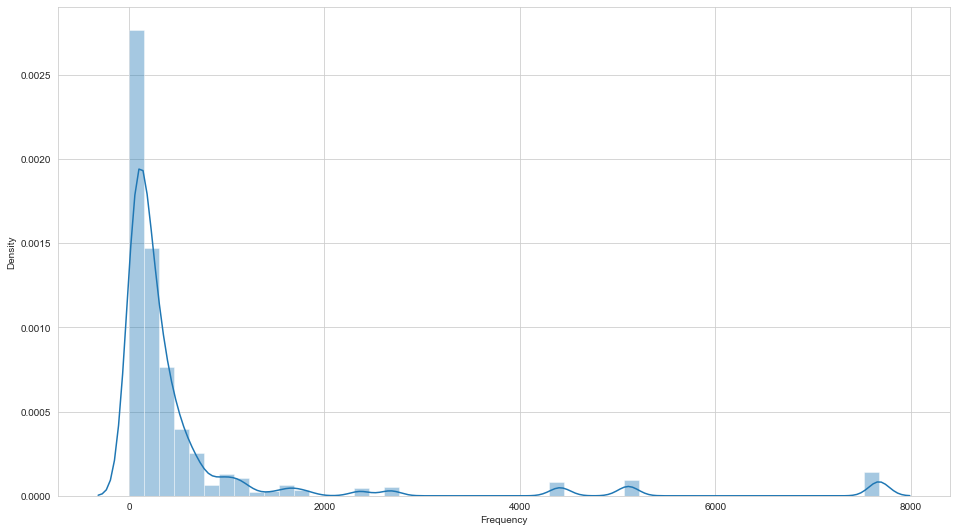

In [ ]:
plt.figure(figsize=(16,9))
sns.distplot(df_UK['Frequency'], bins=50);

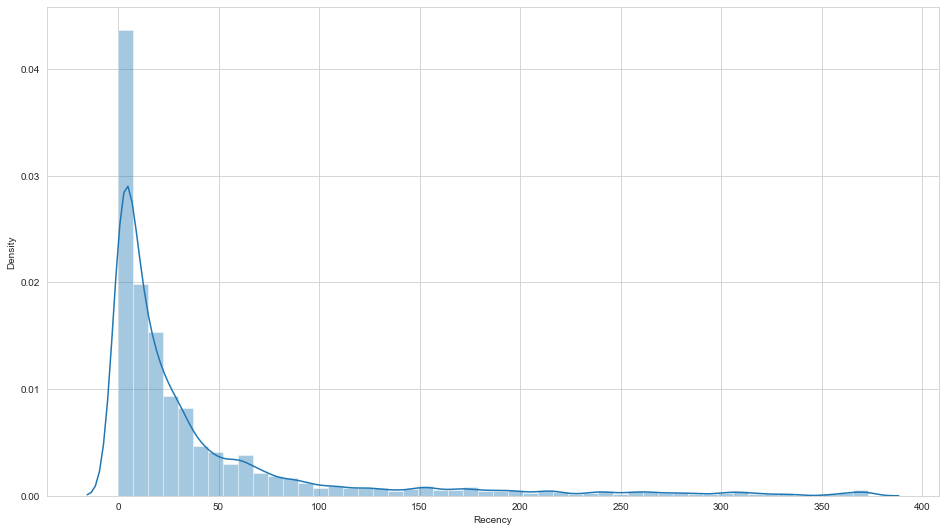

In [ ]:
plt.figure(figsize=(16,9))
sns.distplot(df_UK['Recency'], bins=50);

### v. Monetary: Total amount of money spent

The monetary value is calculated by adding together the cost of the customers' purchases.


1. Calculate sum total cost by customers and named "Monetary"

In [ ]:
df_UK.groupby('CustomerID')["Cost"].transform('sum')

0         5391.210
1         5391.210
2         5391.210
3         5391.210
4         5391.210
            ...   
541889    4206.390
541890   12245.960
541891   12245.960
541892   12245.960
541893   12245.960
Name: Cost, Length: 349203, dtype: float64

In [ ]:
df_UK["Monetary"] = df_UK.groupby('CustomerID')["Cost"].transform('sum')
df_UK.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0 536365.000    85123A  WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                 WHITE METAL LANTERN     6.000   
2 536365.000    84406B      CREAM CUPID HEARTS COAT HANGER     8.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000   

         Date  Recency  Frequency  Monetary  
0  2010-12-01      372        297  5391.210  
1  2010-12-01      372        297  5391.210  
2  2010-12-01      372        297  5391.210

2. Plot RFM distributions

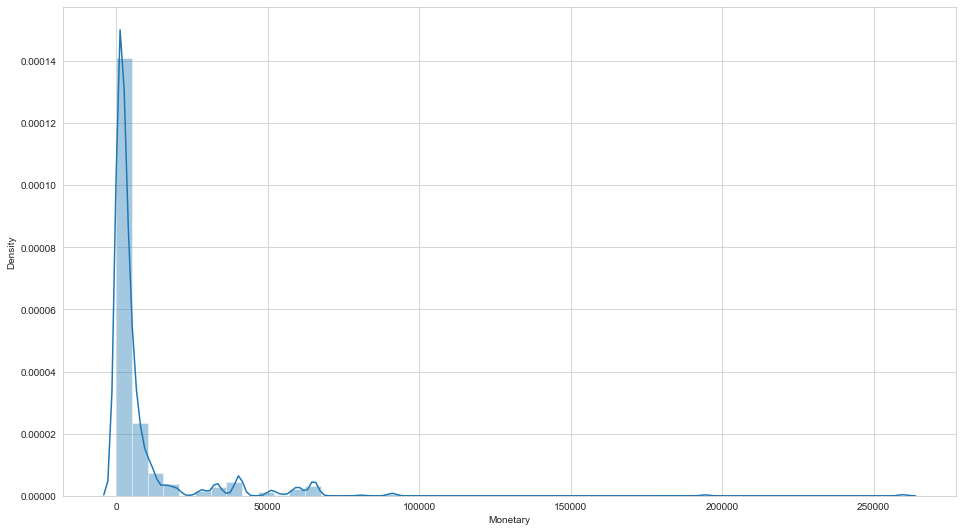

In [ ]:
plt.figure(figsize=(16,9))
sns.distplot(df_UK['Monetary'], bins=50);

### vi. Create RFM Table
Merge the recency, frequency and motetary dataframes

In [ ]:
df_UK.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   

         Date  Recency  Frequency  Monetary  
0  2010-12-01      372        297  5391.210  
1  2010-12-01      372        297  5391.210  
2  2010-12-01      372        297  5391.210  
3  2010-12-01      372        297  5391.210  
4  2010-12-01      372        297  5391.210

In [ ]:
df_rfm_table = df_UK[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary
0   17850.000      372        297  5391.210
1   17850.000      372        297  5391.210
2   17850.000      372        297  5391.210
3   17850.000      372        297  5391.210
4   17850.000      372        297  5391.210

In [ ]:
print(df_rfm_table.sample(15))
print('{:,} rows; {:,} columns'
      .format(df_rfm_table.shape[0], df_rfm_table.shape[1]))

        CustomerID  Recency  Frequency  Monetary
506845   17188.000       11         84  2474.230
467834   15981.000       24         97  3408.480
45970    12841.000        4        414  3991.580
423693   17530.000        1        390  2367.120
103678   14211.000       53        112  2241.100
174922   14336.000       16         90  1614.910
201566   15734.000      114         26  1339.450
218040   17966.000       37         68  1098.430
213777   15704.000      140        117  2293.620
345731   15533.000       19         83   807.570
66448    14692.000      137         68   591.550
301370   13799.000      116         39   688.860
345375   14487.000       26        140  1165.480
9456     14506.000       17        295  1960.650
417883   16258.000       45        135  5203.510
349,203 rows; 4 columns


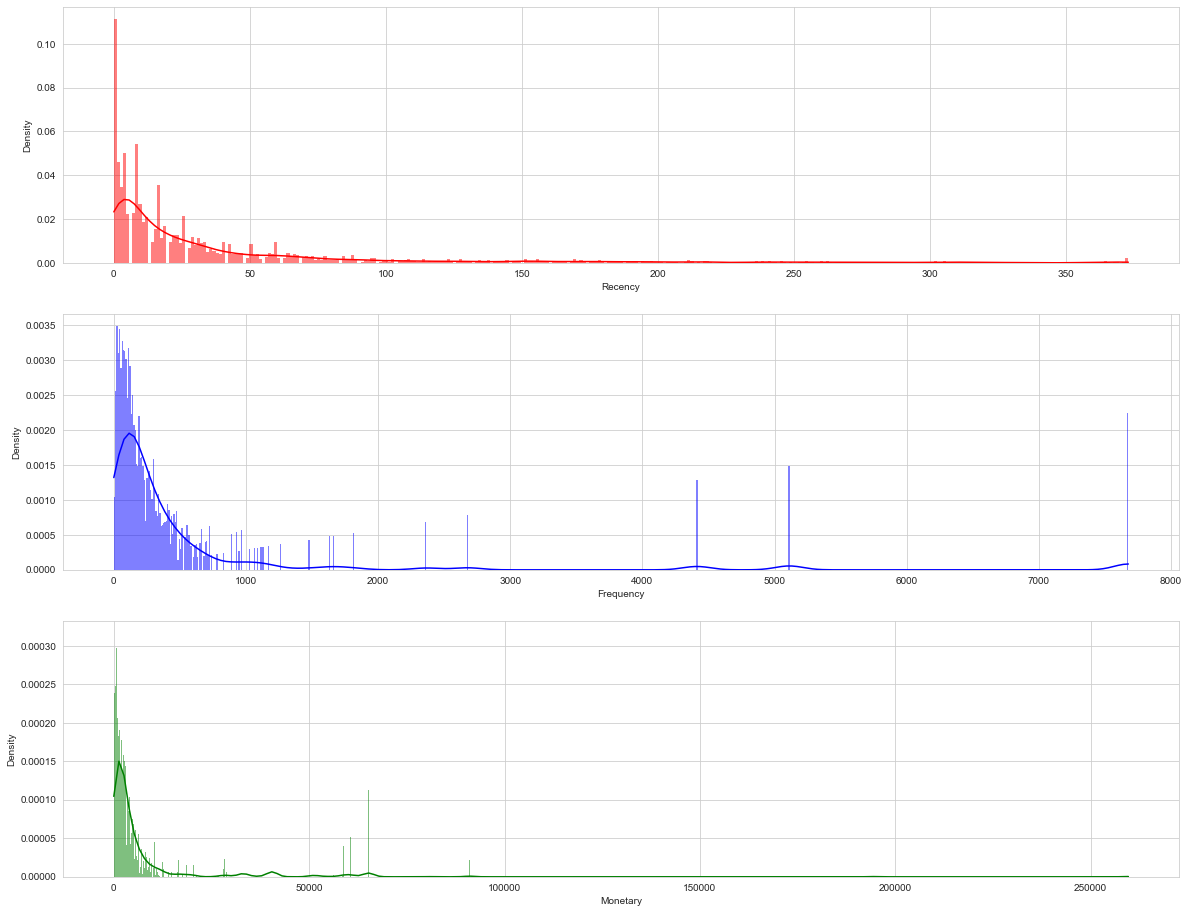

In [ ]:
##Plot RFM distributions
plt.figure(figsize=(20,16))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(df_rfm_table['Recency'], color="red", kde=True, stat="density", linewidth=0)
# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(df_rfm_table['Frequency'], color="blue", kde=True, stat="density", linewidth=0)
# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(df_rfm_table['Monetary'], color="green", kde=True, stat="density", linewidth=0)
# Show the plot
plt.show()


# 3. Customer Segmentation with RFM Scores

Businesses have this ever-lasting urge to understand their customers. The better you understand the customer, the better you serve them, and the higher the financial gain you receive from that customer. Since the dawn of trade, this process of understanding customers for a strategic gain has been there practiced and this task is known majorly as Customer Segmentation
Well as the name suggests, Customer Segmentation could segment customers according to their precise needs. Some of the common ways of segmenting customers are based on their Recency-Frequency-Monatory values, their demographics like gender, region, country, etc, and some of their business-crafted scores. You will use Recency-Frequency-Monatory values for this case.

In this section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

## Calculate RFM Scoring

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis.

**Note**: Data can be assigned into more groups for better granularity, but we will use 4 in this case.

1. Divide the df_rfm into quarters

In [ ]:
df_rfm_table.shape

(349203, 4)

In [ ]:
df_rfm_table.duplicated().any()

True

In [ ]:
df_rfm_table.reset_index().duplicated().sum()

0

In [ ]:
df_rfm_table.drop_duplicates(inplace=True)
df_rfm_table.shape

(3920, 4)

In [ ]:
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary
0    17850.000      372        297  5391.210
9    13047.000       31        172  3237.540
46   13748.000       95         28   948.250
65   15100.000      333          3   876.000
82   15291.000       25        103  4668.300

### i. Creating the RFM Segmentation Table


1. Create two functions, one for Recency and one for Frequency and Monetary. For Recency, customers in the first quarter should be scored as 4, this represents the highest Recency value. Conversely, for Frequency and Monetary, customers in the last quarter should be scored as 4, representing the highest Frequency and Monetary values.

- *Recency*

In [ ]:
df_rfm_table["Recency"].quantile(q = [.25,.5,.75])

0.250    17.000
0.500    50.000
0.750   142.000
Name: Recency, dtype: float64

In [ ]:
def recency_scoring(data):
    if data["Recency"] <= 17.000:
        return 4
    elif data["Recency"] <= 50.000:
        return 3
    elif data["Recency"] <= 142.000:
        return 2
    else:
        return 1

In [ ]:
df_rfm_table['Recency_Quantile'] = df_rfm_table.apply(recency_scoring, axis =1)
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile
0    17850.000      372        297  5391.210                 1
9    13047.000       31        172  3237.540                 3
46   13748.000       95         28   948.250                 2
65   15100.000      333          3   876.000                 1
82   15291.000       25        103  4668.300                 3

- *Frequency*

In [ ]:
df_rfm_table["Frequency"].quantile(q = [.25,.5,.75])

0.250   17.000
0.500   40.000
0.750   98.000
Name: Frequency, dtype: float64

In [ ]:
def frequency_scoring(data):
    if data.Frequency <= 17.000:
        return 1
    elif data.Frequency <= 40.000:
        return 2
    elif data.Frequency <= 98.000:
        return 3
    else:
        return 4

In [ ]:
df_rfm_table['Frequency_Quantile'] = df_rfm_table.apply(frequency_scoring, axis =1)
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile  \
0    17850.000      372        297  5391.210                 1   
9    13047.000       31        172  3237.540                 3   
46   13748.000       95         28   948.250                 2   
65   15100.000      333          3   876.000                 1   
82   15291.000       25        103  4668.300                 3   

    Frequency_Quantile  
0                    4  
9                    4  
46                   2  
65                   1  
82                   4

- *Monetary*

In [ ]:
df_rfm_table["Monetary"].quantile(q = [.25,.5,.75])

0.250    298.185
0.500    644.975
0.750   1571.285
Name: Monetary, dtype: float64

In [ ]:
def monetary_scoring(data):
    if data.Monetary <= 298.185:
        return 1
    elif data.Monetary <= 644.975:
        return 2
    elif data.Monetary <= 1571.285:
        return 3
    else:
        return 4

2. Score customers from 1 to 4 by applying the functions you have created. Also create separate score column for each value. 

In [ ]:
df_rfm_table['Monetary_Quantile'] = df_rfm_table.apply(monetary_scoring, axis =1)
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile  \
0    17850.000      372        297  5391.210                 1   
9    13047.000       31        172  3237.540                 3   
46   13748.000       95         28   948.250                 2   
65   15100.000      333          3   876.000                 1   
82   15291.000       25        103  4668.300                 3   

    Frequency_Quantile  Monetary_Quantile  
0                    4                  4  
9                    4                  4  
46                   2                  3  
65                   1                  3  
82                   4                  4

3. Now that scored each customer, you'll combine the scores for segmentation.

In [ ]:
def rfm_scoring(data):
    return str(int(data['Recency_Quantile'])) + str(int(data['Frequency_Quantile'])) + str(int(data['Monetary_Quantile']))

In [ ]:
df_rfm_table['RFM_Score'] = df_rfm_table.apply(rfm_scoring, axis=1)
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile  \
0    17850.000      372        297  5391.210                 1   
9    13047.000       31        172  3237.540                 3   
46   13748.000       95         28   948.250                 2   
65   15100.000      333          3   876.000                 1   
82   15291.000       25        103  4668.300                 3   

    Frequency_Quantile  Monetary_Quantile RFM_Score  
0                    4                  4       144  
9                    4                  4       344  
46                   2                  3       223  
65                   1                  3       113  
82                   4                  4       344

In [ ]:
df_rfm_table["RFM_Score"].dtype.type

numpy.object_

4. Define rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Level

In [ ]:
df_rfm_table['RFM_Level'] = df_rfm_table['Recency_Quantile'] + df_rfm_table['Frequency_Quantile'] + df_rfm_table['Monetary_Quantile']
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile  \
0    17850.000      372        297  5391.210                 1   
9    13047.000       31        172  3237.540                 3   
46   13748.000       95         28   948.250                 2   
65   15100.000      333          3   876.000                 1   
82   15291.000       25        103  4668.300                 3   

    Frequency_Quantile  Monetary_Quantile RFM_Score  RFM_Level  
0                    4                  4       144          9  
9                    4                  4       344         11  
46                   2                  3       223          7  
65                   1                  3       113          5  
82                   4                  4       344         11

5. Calculate average values for each RFM_Level, and return a size of each segment 

In [ ]:
# Let's see how many of which "rfm_score" here are.
df_rfm_table['RFM_Score'].value_counts().sort_values(ascending=False).head()

444    407
111    343
344    184
122    178
211    166
Name: RFM_Score, dtype: int64

In [ ]:
def segments1(data):
    if data['RFM_Level'] >= 10 :
        return 'Gold'
    elif (data['RFM_Level'] >= 6) and (data['RFM_Level'] < 10 ):
        return 'Silver'
    else:  
        return 'Bronze'

In [ ]:
df_rfm_table ['Customer_Group'] = df_rfm_table.apply(segments1,axis=1)
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile  \
0    17850.000      372        297  5391.210                 1   
9    13047.000       31        172  3237.540                 3   
46   13748.000       95         28   948.250                 2   
65   15100.000      333          3   876.000                 1   
82   15291.000       25        103  4668.300                 3   

    Frequency_Quantile  Monetary_Quantile RFM_Score  RFM_Level Customer_Group  
0                    4                  4       144          9         Silver  
9                    4                  4       344         11           Gold  
46                   2                  3       223          7         Silver  
65                   1                  3       113          5         Bronze  
82                   4                  4       344         11           Gold

In [ ]:
segments2 = {
             'Customer Segment':
                                ['Champions',
                                 'Loyal Customers',
                                 'Potential Loyalist', 
                                 'Recent Customers', 
                                 'Customers Needing Attention', 
                                 'Still Got Hope', 
                                 'Need to Get Them Back',
                                 'Lost', 'Give it a Try'],\
                           'RFM':
                                ['(3|4)-(3|4)-(3|4)', 
                                 '(2|3|4)-(3|4)-(1|2|3|4)', 
                                 '(3|4)-(2|3)-(1|2|3|4)', 
                                 '(4)-(1)-(1|2|3|4)', 
                                 '(2|3)-(2|3)-(2|3)', 
                                 '(2|3)-(1|2)-(1|2|3|4)', 
                                 '(1|2)-(3|4)-(2|3|4)', 
                                 '(1|2)-(1|2)-(1|2)',
                                 '(1|2)-(1|2|3)-(1|2|3|4)']
            }
pd.DataFrame(segments2)

Customer Segment                      RFM
0                    Champions        (3|4)-(3|4)-(3|4)
1              Loyal Customers  (2|3|4)-(3|4)-(1|2|3|4)
2           Potential Loyalist    (3|4)-(2|3)-(1|2|3|4)
3             Recent Customers        (4)-(1)-(1|2|3|4)
4  Customers Needing Attention        (2|3)-(2|3)-(2|3)
5               Still Got Hope    (2|3)-(1|2)-(1|2|3|4)
6        Need to Get Them Back      (1|2)-(3|4)-(2|3|4)
7                         Lost        (1|2)-(1|2)-(1|2)
8                Give it a Try  (1|2)-(1|2|3)-(1|2|3|4)

In [ ]:
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile  \
0    17850.000      372        297  5391.210                 1   
9    13047.000       31        172  3237.540                 3   
46   13748.000       95         28   948.250                 2   
65   15100.000      333          3   876.000                 1   
82   15291.000       25        103  4668.300                 3   

    Frequency_Quantile  Monetary_Quantile RFM_Score  RFM_Level Customer_Group  
0                    4                  4       144          9         Silver  
9                    4                  4       344         11           Gold  
46                   2                  3       223          7         Silver  
65                   1                  3       113          5         Bronze  
82                   4                  4       344         11           Gold

In [ ]:
def categorizer(rfm):
    if (rfm[0] in ['3', '4']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Champions'
        
    elif (rfm[0] in ['2', '3', '4']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Loyal Customers'
        
    elif (rfm[0] in ['3', '4']) & (rfm[1] in ['2', '3']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Potential Loyalist'
    
    elif (rfm[0] in ['4']) & (rfm[1] in ['1']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Recent Customers'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['2', '3']) & (rfm[2] in ['2', '3']):
        rfm = 'Customers Needing Attention'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Still Got Hope'
    
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['2', '3', '4']):
        rfm = 'Need to Get Them Back'
                
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['1', '2']) & (rfm[2] in ['1', '2']):
        rfm = 'Lost'
    
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['1', '2', '3']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Give it a Try'
    
    return rfm 

In [ ]:
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile  \
0    17850.000      372        297  5391.210                 1   
9    13047.000       31        172  3237.540                 3   
46   13748.000       95         28   948.250                 2   
65   15100.000      333          3   876.000                 1   
82   15291.000       25        103  4668.300                 3   

    Frequency_Quantile  Monetary_Quantile RFM_Score  RFM_Level Customer_Group  
0                    4                  4       144          9         Silver  
9                    4                  4       344         11           Gold  
46                   2                  3       223          7         Silver  
65                   1                  3       113          5         Bronze  
82                   4                  4       344         11           Gold

In [ ]:
df_rfm_table['Customers'] = df_rfm_table["RFM_Score"].apply(categorizer)
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile  \
0    17850.000      372        297  5391.210                 1   
9    13047.000       31        172  3237.540                 3   
46   13748.000       95         28   948.250                 2   
65   15100.000      333          3   876.000                 1   
82   15291.000       25        103  4668.300                 3   

    Frequency_Quantile  Monetary_Quantile RFM_Score  RFM_Level Customer_Group  \
0                    4                  4       144          9         Silver   
9                    4                  4       344         11           Gold   
46                   2                  3       223          7         Silver   
65                   1                  3       113          5         Bronze   
82                   4                  4       344         11           Gold   

                      Customers  
0         Need to Get Them Back  
9                     Champions  
46  Customers Needing Attention  
65                Give it a Try  
82                    Champions

In [ ]:
df_rfm_table["Customers"].value_counts(dropna=False)

Champions                      1179
Lost                            716
Loyal Customers                 583
Still Got Hope                  513
Potential Loyalist              354
Customers Needing Attention     215
Need to Get Them Back           163
Give it a Try                   100
Recent Customers                 97
Name: Customers, dtype: int64

In [ ]:
rfm_scoring

<function __main__.rfm_scoring(data)>

In [ ]:
df.Country.value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

## Plot RFM Segments

1. Create your plot and resize it.

In [ ]:
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile  \
0    17850.000      372        297  5391.210                 1   
9    13047.000       31        172  3237.540                 3   
46   13748.000       95         28   948.250                 2   
65   15100.000      333          3   876.000                 1   
82   15291.000       25        103  4668.300                 3   

    Frequency_Quantile  Monetary_Quantile RFM_Score  RFM_Level Customer_Group  \
0                    4                  4       144          9         Silver   
9                    4                  4       344         11           Gold   
46                   2                  3       223          7         Silver   
65                   1                  3       113          5         Bronze   
82                   4                  4       344         11           Gold   

                      Customers  
0         Need to Get Them Back  
9                     Champions  
46  Customers Needing Attention  
65                Give it a Try  
82                    Champions

In [ ]:
df_plot1 = pd.DataFrame(df_rfm_table["Customer_Group"].value_counts(dropna=False).sort_values(ascending=False)).reset_index().rename(columns={'index':'Segments', 'segments1':'Customers'})
df_plot1

Segments  Customer_Group
0   Silver            1603
1   Bronze            1175
2     Gold            1142

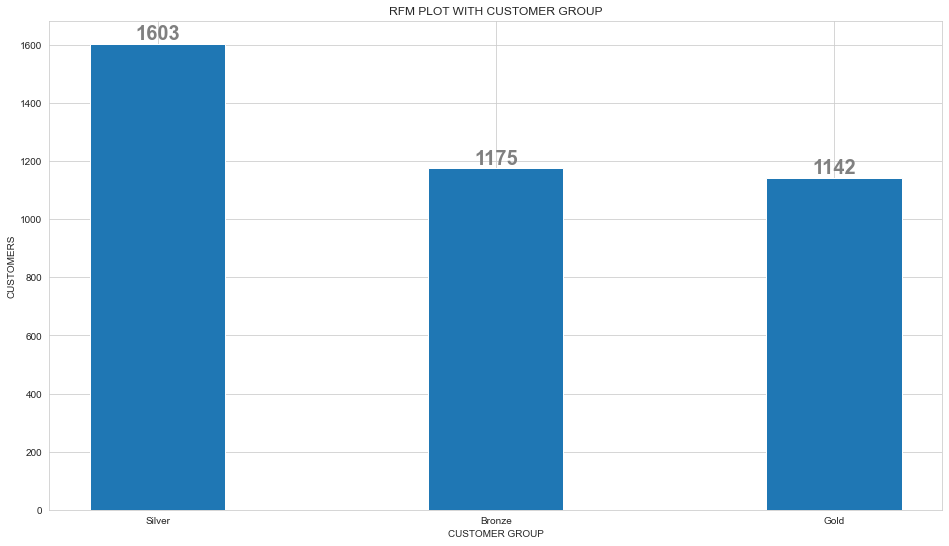

In [ ]:
# MATPLOTLIB
y = df_plot1.Customer_Group.values
x = df_plot1.Segments.values

fig, ax = plt.subplots(figsize = (16,9), dpi=72)
ax.bar(x,y,width=0.4)

plt.title("RFM PLOT WITH CUSTOMER GROUP")
plt.xlabel("CUSTOMER GROUP");
plt.ylabel("CUSTOMERS");

for index,value in enumerate(y):
    plt.text(x=index , y =value , s=str(value) , ha="center", va="bottom", color = 'gray', fontweight = 'bold', fontdict=dict(fontsize=20))
plt.show()

In [ ]:
# PLOTLY

fig = px.bar(df_plot1, x = "Segments", y = "Customer_Group", width=950, height=600)
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(title="RFM PLOT WITH CUSTOMER GROUP", xaxis_title="Customer Group", yaxis_title="CUSTOMERS", legend_title="Segments1", title_font_color="red", title_x=0.5,
                  font=dict(family="Courier New, monospace", size=20, color="RebeccaPurple")
                 )
fig.show()

<IPython.core.display.Javascript object>

In [ ]:
# PLOTLY TREEMAP

fig = px.treemap(df_plot1,
                 path=[df_plot1.Segments], 
                 values='Customer_Group', 
                 width=1000, 
                 height=600)
fig.update_layout(title="RFM PLOT WITH CUSTOMER GROUP",
                  title_x = 0.5, title_font = dict(size=20),
                 )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<IPython.core.display.Javascript object>

Using customer segmentation categories found. We can formulate different marketing strategies and approaches for customer engagement for each type of customer.

Note: The author in the article scores 1 as the highest and 4 as the lowest

2. How many customers do we have in each segment?

In [ ]:
df_rfm_table[(df_rfm_table["Customer_Group"] == "Gold")][["Customers","Customer_Group"]].value_counts()

Customers           Customer_Group
Champions           Gold              1020
Loyal Customers     Gold               105
Potential Loyalist  Gold                17
dtype: int64

In [ ]:
df_rfm_table[(df_rfm_table["Customer_Group"] == "Silver")][["Customers","Customer_Group"]].value_counts()

Customers                    Customer_Group
Loyal Customers              Silver            478
Potential Loyalist           Silver            337
Customers Needing Attention  Silver            215
Need to Get Them Back        Silver            163
Champions                    Silver            159
Still Got Hope               Silver            110
Recent Customers             Silver             97
Give it a Try                Silver             44
dtype: int64

In [ ]:
df_rfm_table[(df_rfm_table["Customer_Group"] == "Bronze")][["Customers","Customer_Group"]].value_counts()

Customers       Customer_Group
Lost            Bronze            716
Still Got Hope  Bronze            403
Give it a Try   Bronze             56
dtype: int64

# 3. Applying K-Means Clustering

Now that we have our customers segmented into 6 different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with K-Means since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

## Data Pre-Processing and Exploring

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
df_rfm_table.head()

CustomerID  Recency  Frequency  Monetary  Recency_Quantile  \
0    17850.000      372        297  5391.210                 1   
9    13047.000       31        172  3237.540                 3   
46   13748.000       95         28   948.250                 2   
65   15100.000      333          3   876.000                 1   
82   15291.000       25        103  4668.300                 3   

    Frequency_Quantile  Monetary_Quantile RFM_Score  RFM_Level Customer_Group  \
0                    4                  4       144          9         Silver   
9                    4                  4       344         11           Gold   
46                   2                  3       223          7         Silver   
65                   1                  3       113          5         Bronze   
82                   4                  4       344         11           Gold   

                      Customers  
0         Need to Get Them Back  
9                     Champions  
46  Customers Needing Attention  
65                Give it a Try  
82                    Champions

In [ ]:
df_rfm_table.groupby('RFM_Level').agg(
                                 {'Recency': ['mean','min','max','count'],
                                  'Frequency': ['mean','min','max','count'],
                                  'Monetary': ['mean','min','max','count']}
                                ).round(1)

Recency                 Frequency                 Monetary           \
             mean  min  max count      mean min   max count     mean      min   
RFM_Level                                                                       
3         258.100  143  373   343     8.100   1    17   343  151.900    3.800   
4         175.400   51  373   361    13.600   1    39   361  233.500    6.200   
5         151.400   18  373   471    20.500   1    84   471  354.700    6.900   
6          97.200    1  373   426    28.200   1    98   426  825.200   35.400   
7          78.600    1  358   387    38.400   1   123   387  734.100  114.300   
8          60.100    0  338   413    54.500   3   248   413  906.400  120.000   
9          46.900    0  372   377    77.700   1   521   377 1792.500  271.200   
10         32.300    0  140   387   111.100  20   400   387 1914.700  302.100   
11         20.100    0   50   348   182.300  41  1175   348 3434.500  653.200   
12          6.600    0   17   407   360.500  99  7676   407 8254.600 1581.800   

                            
                 max count  
RFM_Level                   
3            298.100   343  
4            635.700   361  
5           1308.500   471  
6          77183.600   426  
7           7374.900   387  
8           6912.000   413  
9         168472.500   377  
10         42056.000   387  
11         80850.800   348  
12        259657.300   407

### i. Define and Plot Feature Correlations

Create Heatmap and evaluate the results 

In [ ]:
df_rfm_table.corr()

CustomerID  Recency  Frequency  Monetary  \
CustomerID               1.000    0.008     -0.004     0.003   
Recency                  0.008    1.000     -0.213    -0.129   
Frequency               -0.004   -0.213      1.000     0.330   
Monetary                 0.003   -0.129      0.330     1.000   
Recency_Quantile         0.000   -0.861      0.266     0.174   
Frequency_Quantile      -0.001   -0.444      0.409     0.197   
Monetary_Quantile       -0.047   -0.444      0.353     0.261   
RFM_Level               -0.019   -0.696      0.409     0.251   

                    Recency_Quantile  Frequency_Quantile  Monetary_Quantile  \
CustomerID                     0.000              -0.001             -0.047   
Recency                       -0.861              -0.444             -0.444   
Frequency                      0.266               0.409              0.353   
Monetary                       0.174               0.197              0.261   
Recency_Quantile               1.000               0.469              0.457   
Frequency_Quantile             0.469               1.000              0.736   
Monetary_Quantile              0.457               0.736              1.000   
RFM_Level                      0.766               0.877              0.872   

                    RFM_Level  
CustomerID             -0.019  
Recency                -0.696  
Frequency               0.409  
Monetary                0.251  
Recency_Quantile        0.766  
Frequency_Quantile      0.877  
Monetary_Quantile       0.872  
RFM_Level               1.000

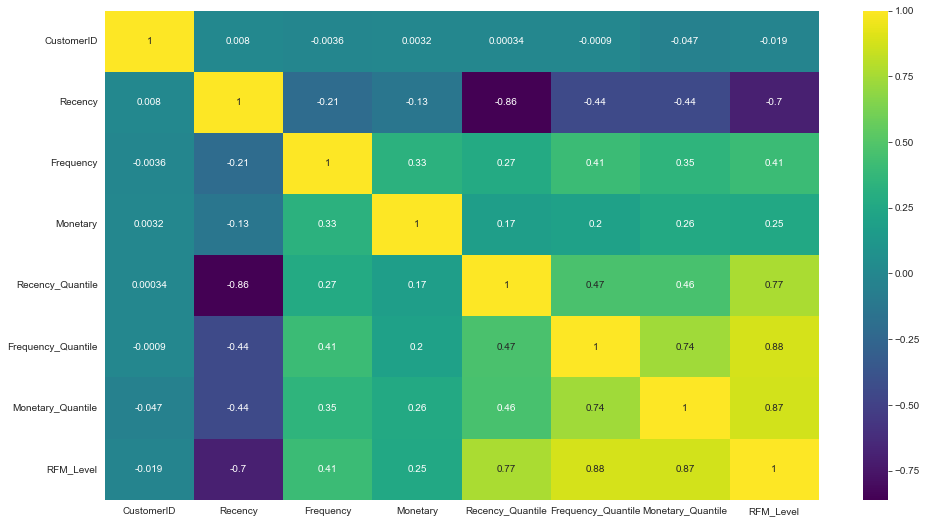

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data = df_rfm_table.corr(), annot=True, cmap = 'viridis');

### ii. Visualize Feature Distributions

To get a better understanding of the dataset, you can costruct a scatter matrix of each of the three features in the RFM data.

<Figure size 1440x720 with 0 Axes>

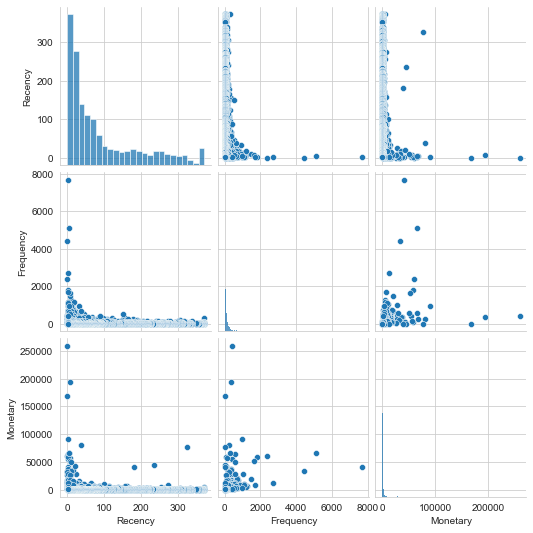

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(df_rfm_table[['Recency', 'Frequency', 'Monetary','Customer_Group']]);

<Figure size 1440x720 with 0 Axes>

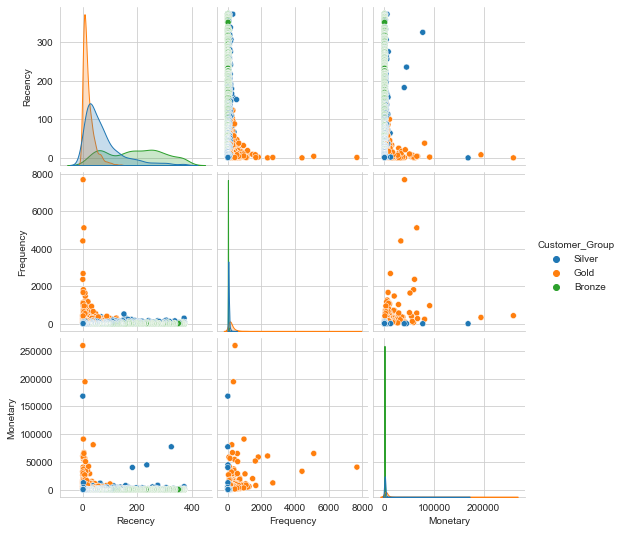

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(df_rfm_table[['Recency', 'Frequency', 'Monetary','Customer_Group']],hue='Customer_Group');

<Figure size 1440x720 with 0 Axes>

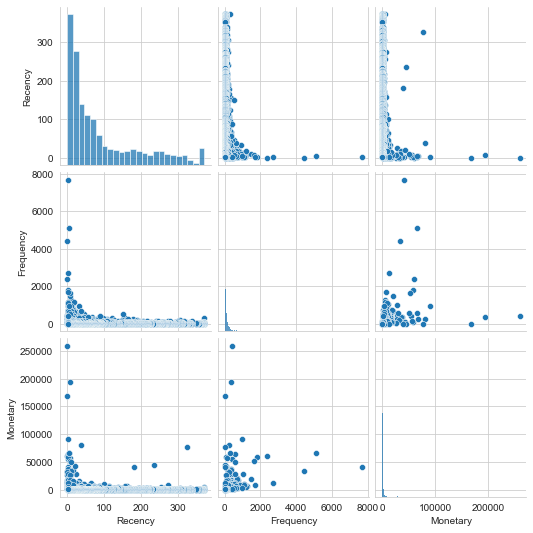

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(df_rfm_table[['Recency', 'Frequency', 'Monetary','Customers']]);

<Figure size 1440x720 with 0 Axes>

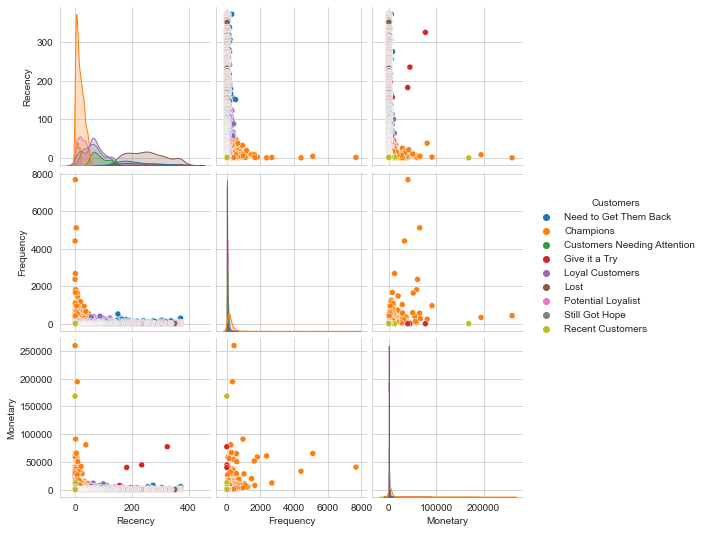

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(df_rfm_table[['Recency', 'Frequency', 'Monetary','Customers']],hue='Customers');

### iii. Data Normalization

1. You can use the logarithm method to normalize the values in a column.

In [ ]:
compare = {'log1p': df_rfm_table['Recency'].apply(np.log1p).values,
           'log'  : (df_rfm_table['Recency'] + 0.1).apply(np.log).values}

pd.DataFrame(compare, index = df_rfm_table.index)

log1p   log
0       5.922 5.919
9       3.466 3.437
46      4.564 4.555
65      5.811 5.808
82      3.258 3.223
...       ...   ...
534480  1.099 0.742
536969  0.693 0.095
537255  0.693 0.095
538064  0.693 0.095
538812  0.693 0.095

[3920 rows x 2 columns]

In [ ]:
rfm_log = df_rfm_table[['Recency', 'Frequency', 'Monetary']].apply(np.log1p).round(3)
rfm_log

Recency  Frequency  Monetary
0         5.922      5.697     8.593
9         3.466      5.153     8.083
46        4.564      3.367     6.856
65        5.811      1.386     6.777
82        3.258      4.644     8.449
...         ...        ...       ...
534480    1.099      4.304     6.121
536969    0.693      2.565     5.288
537255    0.693      2.944     5.842
538064    0.693      1.099     5.889
538812    0.693      2.565     5.431

[3920 rows x 3 columns]

2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

<Figure size 1440x720 with 0 Axes>

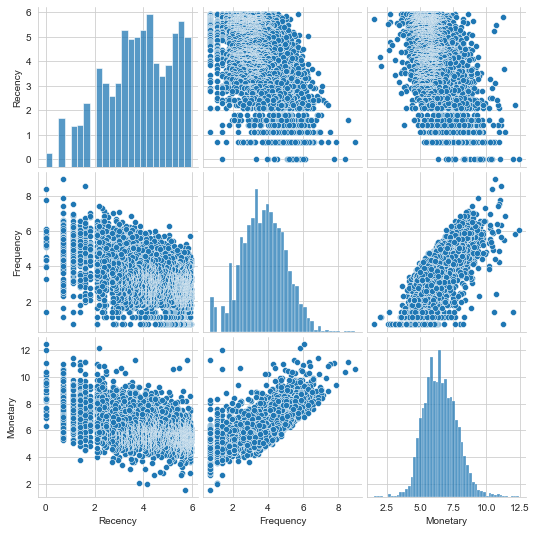

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data = rfm_log);

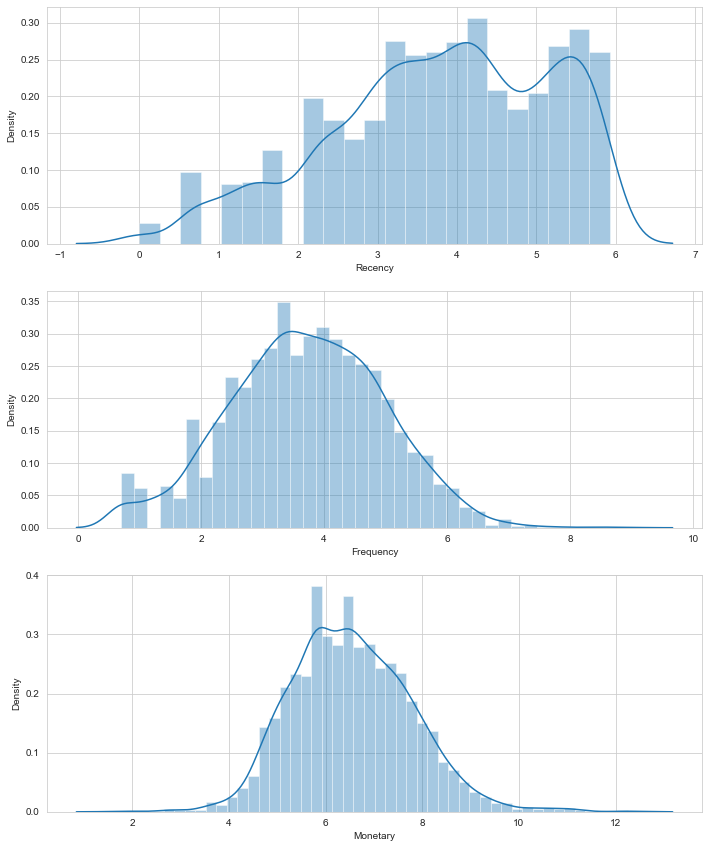

In [ ]:
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.Monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

## K-Means Implementation

For k-means, you have to set k to the number of clusters you want, but figuring out how many clusters is not obvious from the beginning. We will try different cluster numbers and check their silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 

**Note**: K-means is sensitive to initializations because they are critical to qualifty of optima found. Thus, we will use smart initialization called "Elbow Method".

### i. Define the Optimal Number of Clusters

In [ ]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized= scaler.transform(rfm_log)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
hopkins(rfm_log,rfm_log.shape[0])
#Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
#no clusterability and a score tending to 0 express a high cluster tendency.


0.10068061446693126

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

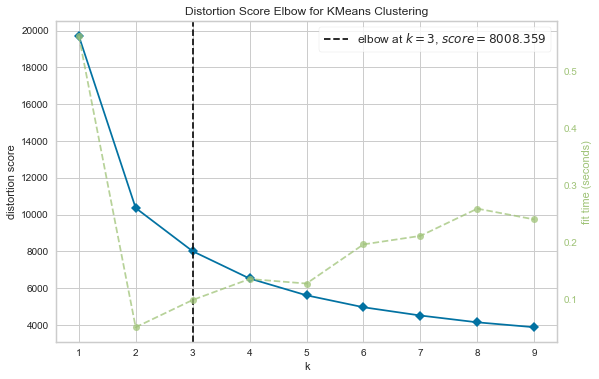

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(rfm_log)        # Fit the data to the visualizer
visualizer.show() 

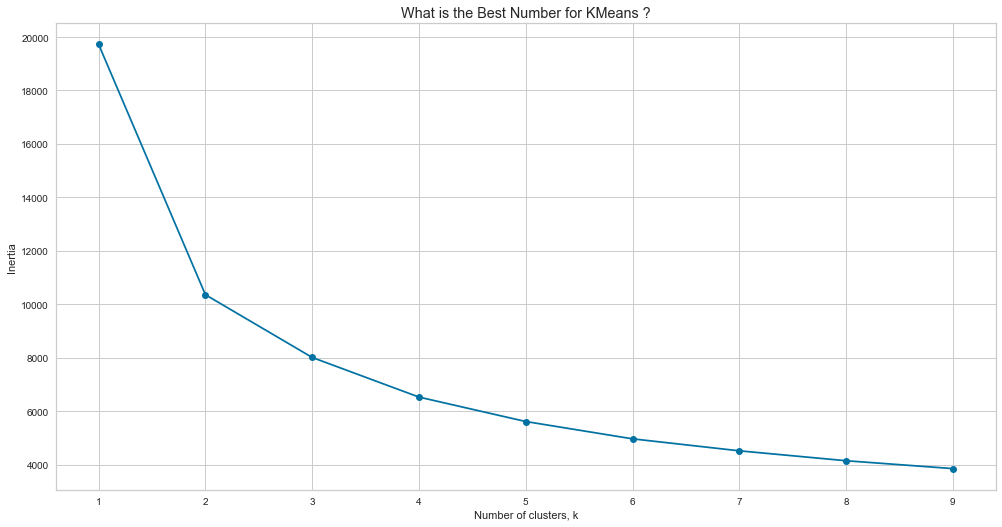

In [ ]:
#First : Get the Best KMeans 
ks = range(1,10)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_log)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [ ]:
# Best number of cluster 2 or 3 ?

In [ ]:
rfm_log.head()

Recency  Frequency  Monetary
0     5.922      5.697     8.593
9     3.466      5.153     8.083
46    4.564      3.367     6.856
65    5.811      1.386     6.777
82    3.258      4.644     8.449

In [ ]:
for k in range(2,10):

    model = KMeans(n_clusters=k)  #  random_state=10
    cluster_labels = model.fit_predict(rfm_log)
    
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_score(rfm_log, cluster_labels))
visualizer.fit(rfm_log)    # Fit the data to the visualizer
visualizer.poof();

For n_clusters = 2 The average silhouette_score is : 0.3986797657090341
For n_clusters = 3 The average silhouette_score is : 0.30495090213272447
For n_clusters = 4 The average silhouette_score is : 0.3115727742462749
For n_clusters = 5 The average silhouette_score is : 0.27722160997185785
For n_clusters = 6 The average silhouette_score is : 0.27751158349042254
For n_clusters = 7 The average silhouette_score is : 0.2631484467068867
For n_clusters = 8 The average silhouette_score is : 0.2609212271425904
For n_clusters = 9 The average silhouette_score is : 0.26124074744418024


In [ ]:
#3 might be the best value for clusters


### ii. Model Fitting

Fit the K-Means Algorithm with the optimal number of clusters you decided and save the model to disk.

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(rfm_log)
labels = kmeans.labels_
rfm_log['labels']=labels

rfm_log.head()

Recency  Frequency  Monetary  labels
0     5.922      5.697     8.593       2
9     3.466      5.153     8.083       0
46    4.564      3.367     6.856       2
65    5.811      1.386     6.777       1
82    3.258      4.644     8.449       0

In [ ]:
rfm_log.labels.value_counts()

2    1635
1    1420
0     865
Name: labels, dtype: int64

### iii. Visualize the Clusters

1. Create a scatter plot and select cluster centers

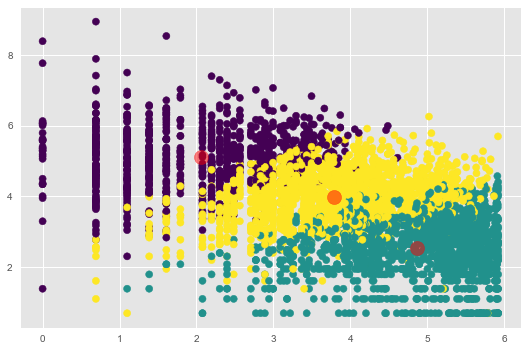

In [ ]:
plt.scatter(rfm_log.iloc[:,0], rfm_log.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red',alpha=0.5, label = 'Centroids')

2. Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results. 

In [ ]:
rfm_log.columns

Index(['Recency', 'Frequency', 'Monetary', 'labels'], dtype='object')

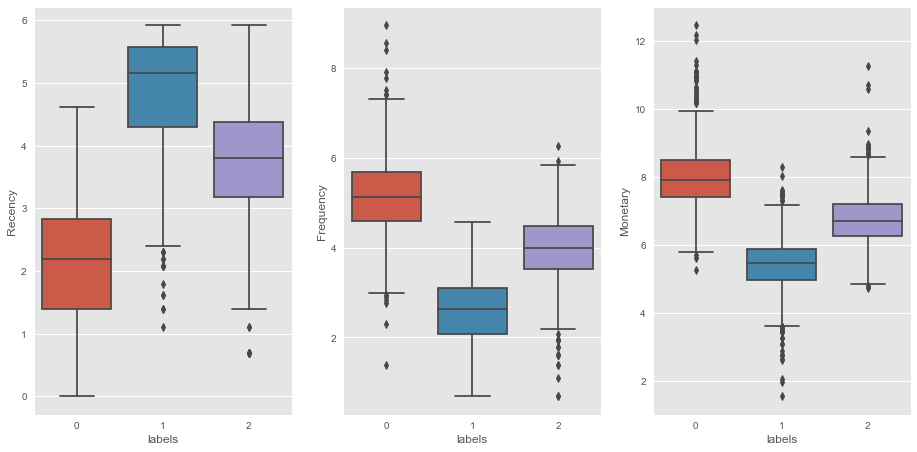

In [ ]:
plt.figure(figsize = (14,7))

plt.subplot(1,3,1)
sns.boxplot(rfm_log['labels'], rfm_log['Recency'])

plt.subplot(1,3,2)
sns.boxplot(rfm_log['labels'], rfm_log['Frequency'])

plt.subplot(1,3,3)
sns.boxplot(rfm_log['labels'], rfm_log['Monetary'])
plt.show()

### iv. Assign the Label

In [ ]:
rfm_log.head()

Recency  Frequency  Monetary  labels
0     5.922      5.697     8.593       2
9     3.466      5.153     8.083       0
46    4.564      3.367     6.856       2
65    5.811      1.386     6.777       1
82    3.258      4.644     8.449       0

In [ ]:
rfm_log["labels"].value_counts(dropna = False)

2    1635
1    1420
0     865
Name: labels, dtype: int64

In [ ]:
# rfm_log['decision'] = rfm_log['labels'].map({0:'Best_Customers',1:'Almost_Lost',2:'Lost_Customers'})
rfm_log['Decision'] = rfm_log['labels'].apply(lambda item: 'Best_Customers' if item == 0 else ("Almost_Lost" if item == 1 else "Lost_Customers"))
rfm_log.head() 

Recency  Frequency  Monetary  labels        Decision
0     5.922      5.697     8.593       2  Lost_Customers
9     3.466      5.153     8.083       0  Best_Customers
46    4.564      3.367     6.856       2  Lost_Customers
65    5.811      1.386     6.777       1     Almost_Lost
82    3.258      4.644     8.449       0  Best_Customers

**Conclusion Example :**

- Cluster 0 : The first cluster belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=4), frequent buyers (F=4), and spent the most (M=4)

- Cluster 1 : Second cluster can be interpreted as passer customers as their last purchase is long ago (R<=1),purchased very few (F>=2 & F < 4) and spent little (M>=4 & M < 4).Company has to come up with new strategies to make them permanent members. Low value customers
- Cluster 2 : The third cluster is more related to the "Almost Lost" segment as they Haven’t purchased for some time(R=1), but used to purchase frequently and spent a lot.

### v. Conclusion

Discuss your final results. Compare your own labels from the Customer Segmentation with the labels found by K-Means.

How we want to continue this analysis depends on how the business plans to use the results and the level of granularity the business stakeholders want to see in the clusters. We can also ask what range of customer behavior from high to low value customers are the stakeholders interested in exploring. From those answers, various methods of clustering can be used and applied on RFM variable or directly on the transaction data set.

**Annotation:**

Limitations of K-means clustering:

1. There is no assurance that it will lead to the global best solution.
2. Can't deal with different shapes(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of K-means show that for many datasets (especially low-dimensional datasets), it may not perform as well as you might hope.

# 5. Create Cohort & Conduct Cohort Analysis
Cohort Analysis is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

Since we will be performing Cohort Analysis based on transaction records of customers, the columns we will be dealing with mainly:
- Invoice Data
- CustomerID
- Price
- Quantity

The following steps will performed to generate the Cohort Chart of Retention Rate:
- Month Extraction from InvioceDate column
- Assigning Cohort to Each Transaction
- Assigning Cohort Index to each transaction
- Calculating number of unique customers in each Group of (ChortDate,Index)
- Creating Cohort Table for Retention Rate
- Creating the Cohort Chart using the Cohort Table

The Detailed information about each step is given below:

## Future Engineering

### i. Extract the Month of the Purchase
First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [ ]:
df_cohort = df
df_cohort.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300  
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340  
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000  
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340  
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340

Now we will use the function created above to convert all the invoice dates into respective month date format.

In [ ]:
import datetime as dt
def take_months(x) : 
    return dt.datetime(x.year,x.month,1)

In [ ]:
df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].apply(take_months)
df_cohort[["InvoiceMonth"]].head(2)

InvoiceMonth
0   2010-12-01
1   2010-12-01

In [ ]:
df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')
df_cohort[['CohortMonth']].head(2)

CohortMonth
0  2010-12-01
1  2010-12-01

### ii. Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, you will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date using the get_date_int() function which you'll create it below.

In [ ]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

You will use this function to extract the integer values for Invoice as well as Cohort Date in 3 seperate series for each of the two columns

In [ ]:
invoice_year, invoice_month, invoice_day = get_month_int(df_cohort, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_month_int(df_cohort, 'CohortMonth')

Use the variables created above to calcualte the difference in days and store them in cohort Index column.

In [ ]:
year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df_cohort['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [ ]:
df_cohort.head()

InvoiceNo StockCode                          Description  Quantity  \
0 536365.000    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1 536365.000 71053.000                  WHITE METAL LANTERN     6.000   
2 536365.000    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3 536365.000    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4 536365.000    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          InvoiceDate  UnitPrice  CustomerID         Country   Cost  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom 15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom 22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom 20.340   

  InvoiceMonth CohortMonth  CohortIndex  
0   2010-12-01  2010-12-01            1  
1   2010-12-01  2010-12-01            1  
2   2010-12-01  2010-12-01            1  
3   2010-12-01  2010-12-01            1  
4   2010-12-01  2010-12-01            1

## Create 1st Cohort: User number & Retention Rate

### i. Pivot Cohort and Cohort Retention

In [ ]:
#Count monthly active customers from each cohort
cohort1 = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort1.head()

CohortMonth  CohortIndex  CustomerID
0  2010-12-01            1         885
1  2010-12-01            2         324
2  2010-12-01            3         286
3  2010-12-01            4         340
4  2010-12-01            5         321

In [ ]:
cohort1[cohort1["CustomerID"]==93]

Empty DataFrame
Columns: [CohortMonth, CohortIndex, CustomerID]
Index: []

In [ ]:
cohort1.head()

CohortMonth  CohortIndex  CustomerID
0  2010-12-01            1         885
1  2010-12-01            2         324
2  2010-12-01            3         286
3  2010-12-01            4         340
4  2010-12-01            5         321

In [ ]:
pivot_cohort1 = cohort1.reset_index().pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID').round(1)
pivot_cohort1

CohortIndex      1       2       3       4       5       6       7       8   \
CohortMonth                                                                   
2010-12-01  885.000 324.000 286.000 340.000 321.000 352.000 321.000 309.000   
2011-01-01  417.000  92.000 111.000  96.000 134.000 120.000 103.000 101.000   
2011-02-01  380.000  71.000  71.000 108.000 103.000  94.000  96.000 106.000   
2011-03-01  452.000  68.000 114.000  90.000 101.000  76.000 121.000 104.000   
2011-04-01  300.000  64.000  61.000  63.000  59.000  68.000  65.000  78.000   
2011-05-01  284.000  54.000  49.000  49.000  59.000  66.000  75.000  27.000   
2011-06-01  242.000  42.000  38.000  64.000  56.000  81.000  23.000     NaN   
2011-07-01  188.000  34.000  39.000  42.000  51.000  21.000     NaN     NaN   
2011-08-01  169.000  35.000  42.000  41.000  21.000     NaN     NaN     NaN   
2011-09-01  299.000  70.000  90.000  34.000     NaN     NaN     NaN     NaN   
2011-10-01  358.000  86.000  41.000     NaN     NaN     NaN     NaN     NaN   
2011-11-01  323.000  36.000     NaN     NaN     NaN     NaN     NaN     NaN   
2011-12-01   41.000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

CohortIndex      9       10      11      12      13  
CohortMonth                                          
2010-12-01  313.000 350.000 331.000 445.000 235.000  
2011-01-01  125.000 136.000 152.000  49.000     NaN  
2011-02-01   94.000 116.000  26.000     NaN     NaN  
2011-03-01  126.000  39.000     NaN     NaN     NaN  
2011-04-01   22.000     NaN     NaN     NaN     NaN  
2011-05-01      NaN     NaN     NaN     NaN     NaN  
2011-06-01      NaN     NaN     NaN     NaN     NaN  
2011-07-01      NaN     NaN     NaN     NaN     NaN  
2011-08-01      NaN     NaN     NaN     NaN     NaN  
2011-09-01      NaN     NaN     NaN     NaN     NaN  
2011-10-01      NaN     NaN     NaN     NaN     NaN  
2011-11-01      NaN     NaN     NaN     NaN     NaN  
2011-12-01      NaN     NaN     NaN     NaN     NaN

In [ ]:
sizes = pivot_cohort1.iloc[:, 0]
retention = pivot_cohort1.divide(sizes, axis=0).round(3)*100  #axis=0 to ensure the divide along the row axis
retention

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2010-12-01  100.000 36.600 32.300 38.400 36.300 39.800 36.300 34.900 35.400   
2011-01-01  100.000 22.100 26.600 23.000 32.100 28.800 24.700 24.200 30.000   
2011-02-01  100.000 18.700 18.700 28.400 27.100 24.700 25.300 27.900 24.700   
2011-03-01  100.000 15.000 25.200 19.900 22.300 16.800 26.800 23.000 27.900   
2011-04-01  100.000 21.300 20.300 21.000 19.700 22.700 21.700 26.000  7.300   
2011-05-01  100.000 19.000 17.300 17.300 20.800 23.200 26.400  9.500    NaN   
2011-06-01  100.000 17.400 15.700 26.400 23.100 33.500  9.500    NaN    NaN   
2011-07-01  100.000 18.100 20.700 22.300 27.100 11.200    NaN    NaN    NaN   
2011-08-01  100.000 20.700 24.900 24.300 12.400    NaN    NaN    NaN    NaN   
2011-09-01  100.000 23.400 30.100 11.400    NaN    NaN    NaN    NaN    NaN   
2011-10-01  100.000 24.000 11.500    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01  100.000 11.100    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01  100.000    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12     13  
CohortMonth                              
2010-12-01  39.500 37.400 50.300 26.600  
2011-01-01  32.600 36.500 11.800    NaN  
2011-02-01  30.500  6.800    NaN    NaN  
2011-03-01   8.600    NaN    NaN    NaN  
2011-04-01     NaN    NaN    NaN    NaN  
2011-05-01     NaN    NaN    NaN    NaN  
2011-06-01     NaN    NaN    NaN    NaN  
2011-07-01     NaN    NaN    NaN    NaN  
2011-08-01     NaN    NaN    NaN    NaN  
2011-09-01     NaN    NaN    NaN    NaN  
2011-10-01     NaN    NaN    NaN    NaN  
2011-11-01     NaN    NaN    NaN    NaN  
2011-12-01     NaN    NaN    NaN    NaN

### ii. Visualize analysis of cohort 1 using seaborn and matplotlib modules

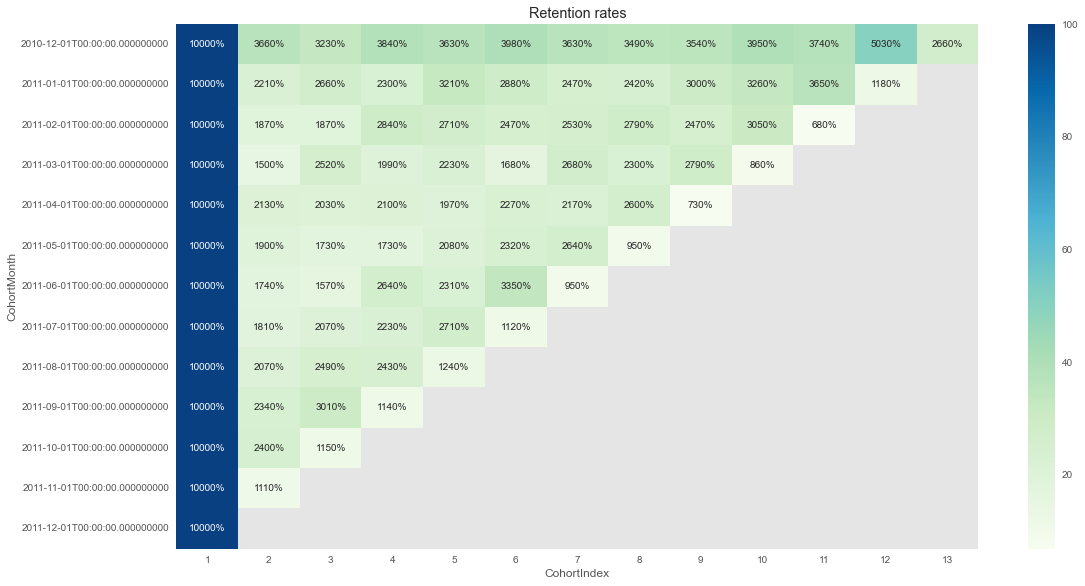

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Retention rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', cmap="GnBu")
plt.show()

## Create the 2nd Cohort: Average Quantity Sold

### i. Pivot Cohort and Cohort Retention

In [ ]:
cohort2 = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
cohort2.head()

CohortMonth  CohortIndex  Quantity
0  2010-12-01            1    11.938
1  2010-12-01            2    15.573
2  2010-12-01            3    15.593
3  2010-12-01            4    15.761
4  2010-12-01            5    13.505

In [ ]:
pivot_cohort2 = cohort2.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity').round(1)
pivot_cohort2

CohortIndex     1      2      3      4      5      6      7       8      9   \
CohortMonth                                                                   
2010-12-01  11.900 15.600 15.600 15.800 13.500 14.800 16.000  15.500 18.100   
2011-01-01  17.200 13.300 12.600 15.100 12.800 15.300 14.900  14.800 11.600   
2011-02-01  11.100 13.500 19.000 12.000 12.300 12.300 13.500  13.300 10.900   
2011-03-01   9.900 11.700 13.300 10.100 14.300 13.000 13.400  13.700 11.200   
2011-04-01  10.000 10.400  9.800 11.800 11.800  8.600  9.900   9.500  7.400   
2011-05-01  11.300  9.600 14.100 12.800 11.100  8.700 10.600 109.900    NaN   
2011-06-01  10.600 14.500 10.800 13.500 10.600  9.800  9.400     NaN    NaN   
2011-07-01   9.800 13.800  7.300  8.100  6.100  7.100    NaN     NaN    NaN   
2011-08-01  10.000  6.200  5.400  6.200  7.100    NaN    NaN     NaN    NaN   
2011-09-01  12.100  6.200  8.000  8.900    NaN    NaN    NaN     NaN    NaN   
2011-10-01   8.900  7.200  8.400    NaN    NaN    NaN    NaN     NaN    NaN   
2011-11-01   7.700  9.800    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
2011-12-01  14.900    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   

CohortIndex     10     11     12     13  
CohortMonth                              
2010-12-01  17.600 18.900 13.400 15.300  
2011-01-01  10.500  9.400 10.000    NaN  
2011-02-01  12.300 13.400    NaN    NaN  
2011-03-01   9.500    NaN    NaN    NaN  
2011-04-01     NaN    NaN    NaN    NaN  
2011-05-01     NaN    NaN    NaN    NaN  
2011-06-01     NaN    NaN    NaN    NaN  
2011-07-01     NaN    NaN    NaN    NaN  
2011-08-01     NaN    NaN    NaN    NaN  
2011-09-01     NaN    NaN    NaN    NaN  
2011-10-01     NaN    NaN    NaN    NaN  
2011-11-01     NaN    NaN    NaN    NaN  
2011-12-01     NaN    NaN    NaN    NaN

### ii. Visualize analysis of cohort 2 using seaborn and matplotlib modules

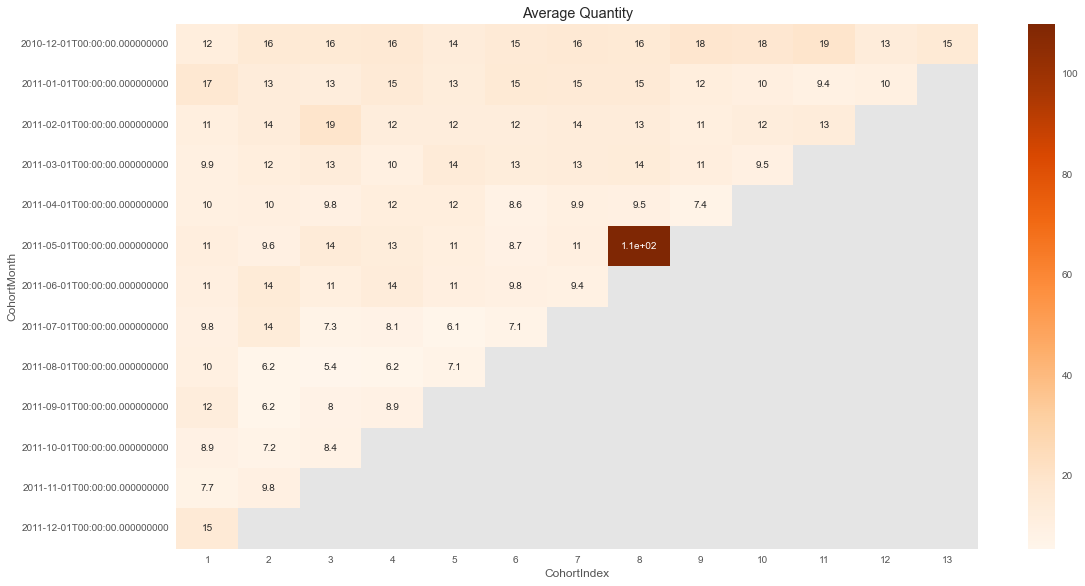

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Average Quantity')
sns.heatmap(data=pivot_cohort2, annot=True, cmap="Oranges")
plt.show()

## Create the 3rd Cohort: Average Sales


### i. Pivot Cohort and Cohort Retention

In [ ]:
cohort3 = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['Cost'].mean().reset_index()
cohort3.head()

CohortMonth  CohortIndex   Cost
0  2010-12-01            1 21.895
1  2010-12-01            2 27.114
2  2010-12-01            3 26.643
3  2010-12-01            4 26.903
4  2010-12-01            5 21.012

In [ ]:
pivot_cohort3 = cohort3.pivot(index='CohortMonth', columns='CohortIndex', values='Cost').round(1)
pivot_cohort3.head()

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2010-12-01  21.900 27.100 26.600 26.900 21.000 27.900 28.100 27.200 29.100   
2011-01-01  26.600 24.800 20.800 30.900 22.400 26.100 25.100 25.200 19.000   
2011-02-01  17.700 20.600 21.300 19.300 17.600 16.900 22.100 22.800 18.600   
2011-03-01  17.500 21.000 22.600 18.000 21.100 18.900 21.900 19.800 16.600   
2011-04-01  16.900 21.000 19.500 18.700 19.300 14.800 15.100 15.700 12.100   

CohortIndex     10     11     12     13  
CohortMonth                              
2010-12-01  33.200 33.700 23.300 25.600  
2011-01-01  22.100 19.400 19.300    NaN  
2011-02-01  22.000 23.500    NaN    NaN  
2011-03-01  12.900    NaN    NaN    NaN  
2011-04-01     NaN    NaN    NaN    NaN

### ii. Visualize analysis of cohort 3 using seaborn and matplotlib modules

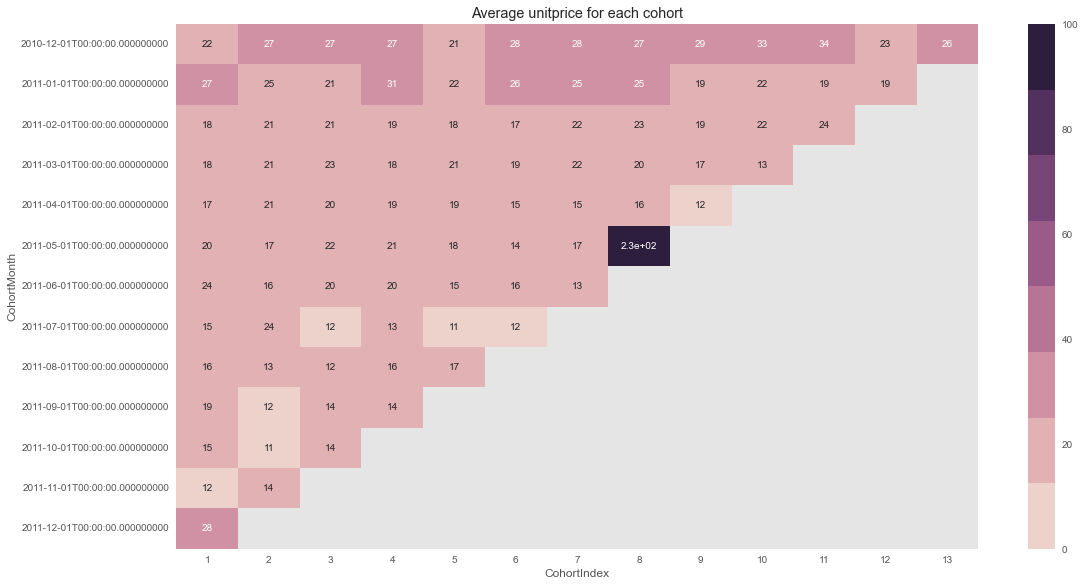

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Average unitprice for each cohort')
sns.heatmap(data=pivot_cohort3 ,annot = True, vmin = 0.0, vmax =100,cmap=sns.cubehelix_palette(8))
plt.show()

For e-commerce organisations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get answers to following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employed to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasoanlity pattern in Customer behahiour?